## 회귀분석

In [3]:
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt

# Load the mtcars dataset
mtcars = sm.datasets.get_rdataset('mtcars').data

# Select the variables for regression
x = mtcars[['hp', 'wt']]
y = mtcars['mpg']

# Add a constant term to the independent variable
X = sm.add_constant(x)

# Fit the regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary statistics
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     69.21
Date:                Fri, 16 Jun 2023   Prob (F-statistic):           9.11e-12
Time:                        15:33:01   Log-Likelihood:                -74.326
No. Observations:                  32   AIC:                             154.7
Df Residuals:                      29   BIC:                             159.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2273      1.599     23.285      0.0

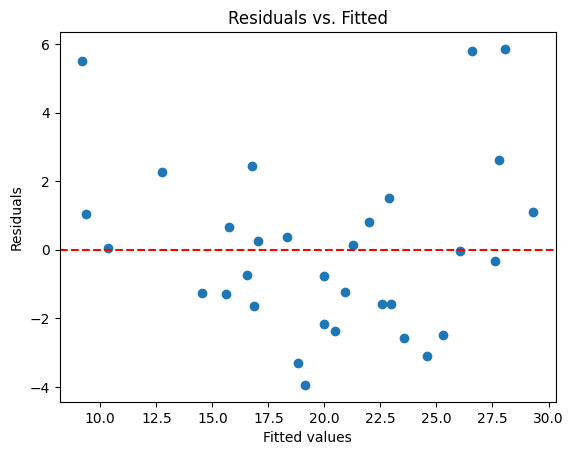

In [4]:
# Check the assumptions

# 1. Linearity
# Residuals vs. Fitted plot
fitted_values = results.fittedvalues
residuals = results.resid
plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [6]:
# 2. Independence of residuals
# Durbin-Watson test
dw_statistic = sm.stats.stattools.durbin_watson(residuals)
print("Durbin-Watson statistic:", dw_statistic)

Durbin-Watson statistic: 1.3623992729510301


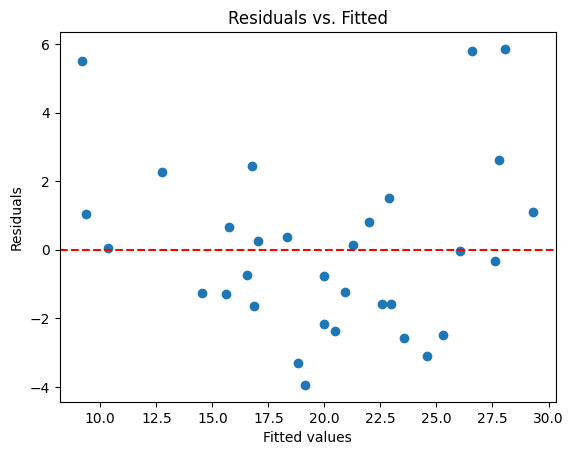

In [7]:

# 3. Homoscedasticity
# Residuals vs. Fitted plot (checking for constant spread)
plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

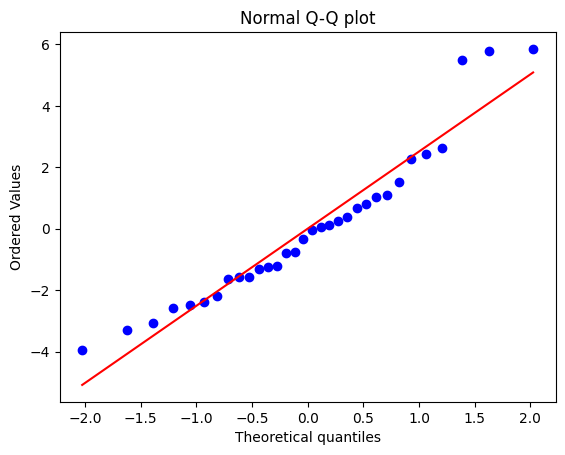

In [8]:
# 4. Normality of residuals
# QQ plot
stats.probplot(residuals, plot=plt)
plt.title('Normal Q-Q plot')
plt.show()